<a href="https://colab.research.google.com/github/dennistay1981/Resources/blob/main/EDA%20TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('xx.csv')

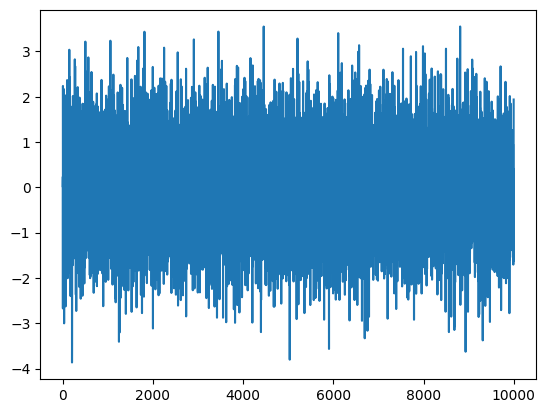

In [7]:
#data = np.random.normal(0,1,10000)
plt.plot(data)

In [12]:
# prompt: plot acf and pacf of data. then run auto arima on data
pip install pmdarima

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# Calculate ACF and PACF
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(data, lags=20, method='ols', ax=plt.gca())
plt.show()



In [ ]:
"""
Fit the best ARIMA model automatically

The m parameter = the number of observations per seasonal cycle, or the number of time steps in each season
For example, if the data has a yearly seasonality, the seasonal period would be 12 for monthly data.
m must be known apriori. Typically, m will correspond to some recurrent periodicity such as 7 (daily), 12 (monthly), 52 (weekly)
"""
model = pm.auto_arima(data, start_p=0, start_q=0, test='adf', max_p=3, max_q=3, d=None,seasonal=True,
                      start_P=0, D=None, trace=True,  error_action='ignore', suppress_warnings=True,
                      stepwise=True)

# Print the summary of the selected model